손실 곡선

In [31]:
# 패션 mnist 데이터셋 훈련세트와 검증세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled =train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [32]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [33]:
# 모델 구조 확인
model=model_fn()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history  = model.fit(train_scaled, train_target, epochs=5, verbose=0) #verbose 매개변수는 훈련과정 출력 조절.기본값은 1

In [35]:
print(history.history.keys())
# 케라스는 기본적으로 에포크마다 손실 계산.

dict_keys(['loss', 'accuracy'])


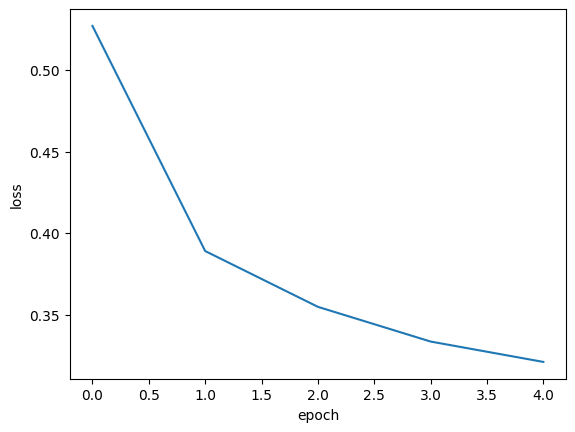

In [36]:
# history속성에 포함된 손실과 정확도를 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

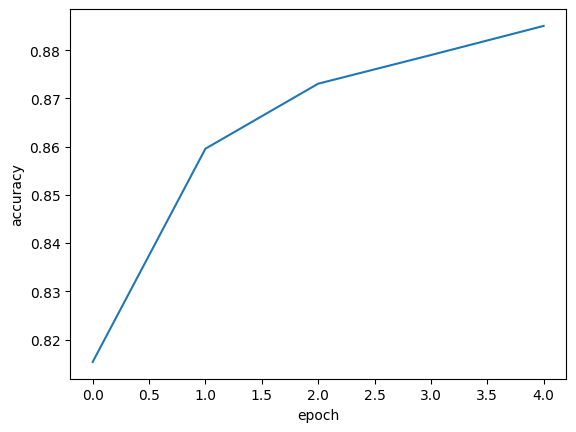

In [37]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

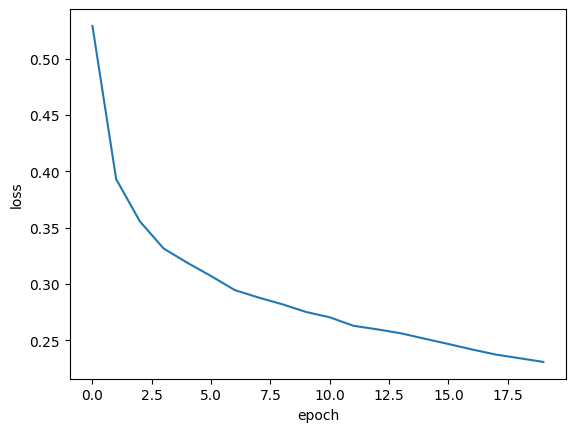

In [38]:
# 에포크 횟수를 20으로 늘려서 모델 훈련 후 손실 그래프 그리기
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증 손실
-에포크에 따른 과대적합과 과소적합을 파악하려면 훈련세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요.
-손실을 사용하여 과대/과소 적합 확인

In [39]:
# 에포크마다 검증 손실 계산. validation_data  매개변수에 검증에 사용할 입력과 타깃값 튜플로 만들어 전달.
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))

In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


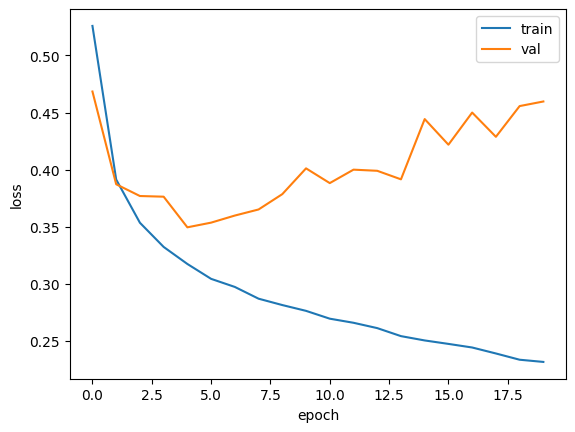

In [41]:
# 과대/과소적합 확인_훈련손실과 검증 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

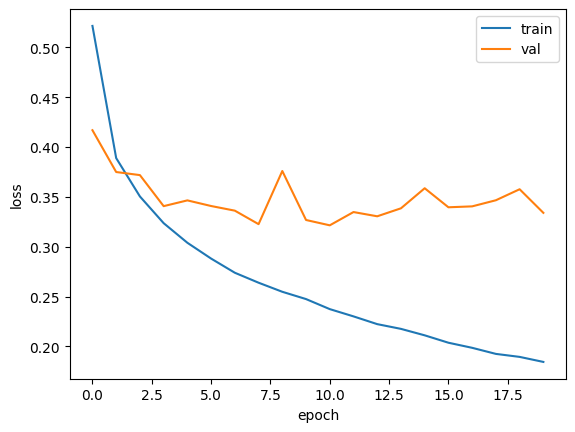

In [45]:
# adam(에포크가 진행되면서 학습률의 크기 조정함) 옵티마이저 적용하여 훈련손실과 검증 손실 그리기
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

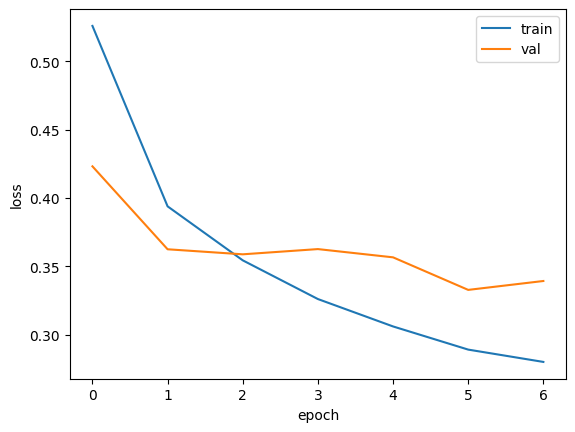

In [46]:
# epochs=7로 지정하여 그래프 그려보기
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=7, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

드롭아웃

-층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는 방식
-이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함.
-일부 뉴런의 출력이 없을 수있다는것을 감안하면 더 안정적인 예측을 만들 수 있을 것.

In [47]:
# 케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공. 30%정도 드롭아웃
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


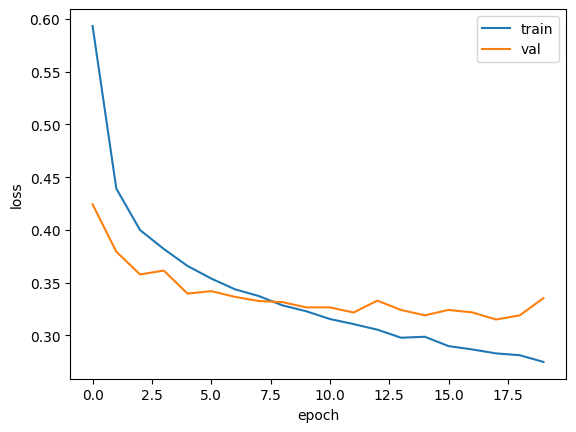

In [51]:
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할때는 자동으로 드롭아웃을 적용하지 않음.
# 훈련손실과 검증 손실 그래프 그리기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

모델 저장과 복원

In [58]:
# 에포크 횟수를 10으로 다시 지정하고 모델 훈련
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [59]:
# save_weight() 훈련된 모델의 파라미터를 저장하는 간편한 메서드, 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장.
model.save_weights('model-weights.h5')

In [60]:
# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드.
model.save('model-whole.h5')

In [61]:
# 파일확인(!ls로 실행시 오류  -> !dir로 변경하여 실행)
!dir -al *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F084-AEB4

 c:\workspace 디렉터리


 c:\workspace 디렉터리

2024-02-27  오전 11:45           982,480 model-weight.h5
2024-02-27  오전 11:56           333,320 model-weights.h5
2024-02-27  오전 11:56           982,480 model-whole.h5
               3개 파일           2,298,280 바이트
               0개 디렉터리  137,213,992,960 바이트 남음


In [64]:
# 훈련하지 않은 새로운 모델을 만들고 model-weight.h5 파일에서 새로운 모델을만들어 바로 사용
# load_weights()메서드를 사용하려면 save_weight()메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함.
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

모델의 검증정확도 확인(케라스에서 예측을 수행하는 predict()메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환)

In [65]:
# 10게 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산하기
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 1ms/step
0.87925


In [68]:
# 모델전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
# 모델이 저장된 파일을 읽을때는 load_model() 함수 사용._모델 파라미터뿐만 아니라 모델구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate() 메서드 사용가능.
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8792


[0.33052733540534973, 0.8792499899864197]

콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들.
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용.
- ModelCheckpoint 콜백은 기본적으로 에포크마다 모델 저장.
- save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델을 저장할수 있음.

In [72]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaeld, val_target), callbacks=[checkpoint_cb])

In [73]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8877


[0.3155302107334137, 0.887666642665863]

조기종료(early stopping)

- 과대적합이 시작되기 전에 훈련을 미리 중지하는것
- 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄수 있다.
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있다.

케라스에는 조기 종료를 위한 EarlyStopping 콜백 제공
- patience  매개변수: 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정.
- restore_best_weights 매개변수: True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.
- ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할때 훈련을 중지할 수 있다.
  또한, 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다. 

In [75]:
#  두 콜백 함께 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights =True)
history= model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [77]:
# 몇번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인할수 있다.
# 에포크 횟수가 0부터 시작이므로 결과값 +1번째 에포크에서 훈련 중지되었다는것을 의미.
# patience=2로 지정했으므로 최상의 모델은 결과값 +1번째 -2 번째 에포크.
print(early_stopping_cb.stopped_epoch)

9


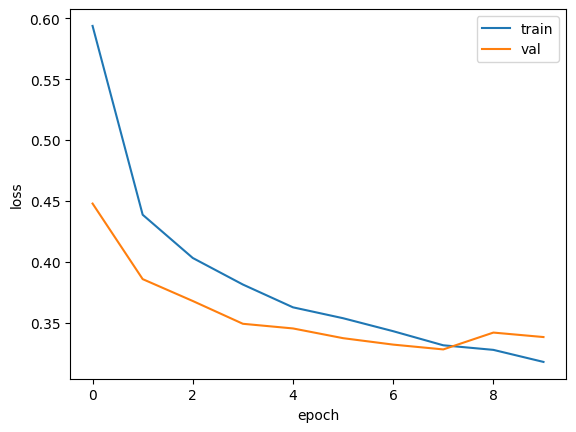

In [78]:
# 훈련 손실과 검증 손실 출력 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [79]:
# 조기종료로 얻은 모델을 사용해 검증 세트에 대한 성능확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8804


[0.32790204882621765, 0.8804166913032532]